<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [11]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
 #dont run this shell   

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


### Load Data From CSV File


In [12]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [13]:
df.shape
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


### Convert to date time object


In [14]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [15]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [16]:
# notice: installing seaborn might takes a few minutes


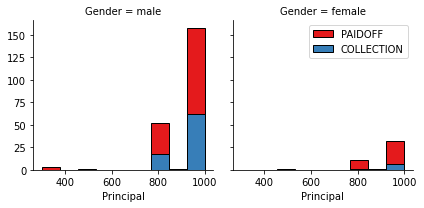

In [17]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

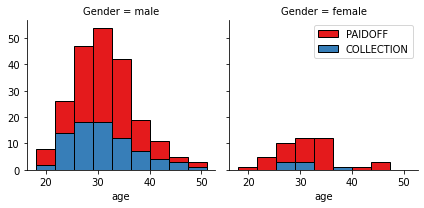

In [18]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


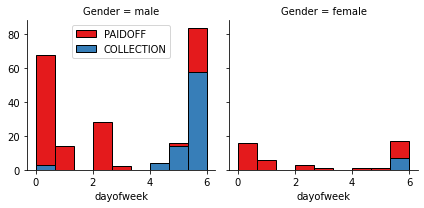

In [19]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
# g.axes[-1].legend()
g.axes[0].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [20]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [21]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [24]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [25]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [26]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [27]:
y = df['loan_status']
y[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
k_list=[2,3,4,5,6,7,8,9]
test_size_list=[0.1,0.2,0.3,0.4]
rf=pd.DataFrame(columns=test_size_list,index=k_list)

In [30]:
for k in k_list:
    for t in test_size_list:
        train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=t)
        kn=KNeighborsClassifier(n_neighbors=k)
        kn.fit(train_x,train_y)
        yhat_kn=kn.predict(test_x)
        acs=accuracy_score(test_y,yhat_kn)
        rf.at[k,t]=acs
rf

,0.1,0.2,0.3,0.4
2,0.571429,0.685714,0.663462,0.611511
3,0.742857,0.742857,0.673077,0.726619
4,0.6,0.7,0.634615,0.690647
5,0.742857,0.614286,0.740385,0.654676
6,0.828571,0.642857,0.692308,0.697842
7,0.828571,0.785714,0.75,0.76259
8,0.742857,0.714286,0.682692,0.748201
9,0.657143,0.771429,0.692308,0.697842


**with test size=0.2 and number of neighbors=6, the model has the highest accuracy score**

# Decision Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier
rf2={}
for t in test_size_list:
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=t)
    tree=DecisionTreeClassifier()
    tree.fit(train_x,train_y)
    yhat_tree=tree.predict(test_x)
    acs=accuracy_score(test_y,yhat_tree)
    rf2[str(t)]=acs
rf2

{'0.1': 0.8,
 '0.2': 0.7285714285714285,
 '0.3': 0.6538461538461539,
 '0.4': 0.6330935251798561}

**with test_size=0.2, the model has the highest accuracy score**

# Support Vector Machine


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
C_list=[0.001,0.01,0.1,1]
test_size_list=[0.1,0.2,0.3,0.4]
rf=pd.DataFrame(index=C_list,columns=test_size_list)
for c in C_list:
    for t in test_size_list:
        train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=t)
        svm=SVC(C=c)
        svm.fit(train_x,train_y)
        yhat_svm=svm.predict(test_x)
        acs=accuracy_score(test_y,yhat_svm)
        rf.at[c,t]=acs
rf

,0.1,0.2,0.3,0.4
0.001,0.685714,0.714286,0.75,0.776978
0.010,0.714286,0.785714,0.75,0.748201
0.100,0.657143,0.814286,0.807692,0.726619
1.000,0.8,0.742857,0.711538,0.647482


**with regularization parameter=0.01 and test_size=0.2, produce the highest accuracy score**

# Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression

test_size_list=[0.1,0.2,0.3,0.4]
r_dict={}
for t in test_size_list:
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=t)
    lr=LogisticRegression()
    lr.fit(train_x,train_y)
    yhat_lr=lr.predict(test_x)
    acs=accuracy_score(test_y,yhat_lr)
    r_dict[str(t)]=acs
r_dict

{'0.1': 0.6285714285714286,
 '0.2': 0.6714285714285714,
 '0.3': 0.7307692307692307,
 '0.4': 0.7410071942446043}

**with test_size=0.1, the model has highest accuracy score

# Model Evaluation using Test set


In [34]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
# do not run this cell

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


### Load Test set for evaluation


In [36]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

**base on the results above, I decide to use 0.2 test size, 6 n_neighbors in k_neighbor model, regularization parameter of 0.01 in svm**

In [49]:
test_df.head()
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
# test_df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True), uncomment this line of code if ValueError occured
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_x=test_df[['Principal','terms','age','Gender','weekend']]
testx=pd.concat([test_x,pd.get_dummies(test_df['education'])],axis=1,)
testx.drop(columns='Master or Above',inplace=True)
testy=np.array(test_df.loan_status)
algorithms=['KNN','Decision Tree','SVM','Logistic Regression']
scores=['Algorithms','Jaccard','F1-Score','Logloss']
result_frame=pd.DataFrame(columns=scores)
for i in range(len(algorithms)):
    result_frame.at[i,'Algorithms']=algorithms[i]
for i in range(3):
    result_frame.at[i,'Logloss']='Not applicable'
result_frame.set_index('Algorithms',inplace=True)
result_frame

#KNN
kn=KNeighborsClassifier(n_neighbors=6)
kn.fit(X,y)
yhat_kn=kn.predict(testx)
js=jaccard_score(testy,yhat_kn,average='weighted')
f1=f1_score(testy,yhat_kn,average='weighted')
result_frame.at['KNN','Jaccard']=js
result_frame.at['KNN','F1-Score']=f1


#Decision Tree
tree=DecisionTreeClassifier()
tree.fit(X,y)
yhat_tree=tree.predict(testx)
js=jaccard_score(testy,yhat_tree,average='weighted') 
f1=f1_score(testy,yhat_tree,average='weighted')
result_frame.at['Decision Tree','Jaccard']=js
result_frame.at['Decision Tree','F1-Score']=f1
result_frame

#SVM
svm=SVC(C=0.01)
svm.fit(X,y)
yhat_svm=svm.predict(testx)
js=jaccard_score(testy,yhat_svm,average='weighted') 
f1=f1_score(testy,yhat_svm,average='weighted')
result_frame.at['SVM','Jaccard']=js
result_frame.at['SVM','F1-Score']=f1

#Logistic Regression
lr=LogisticRegression()
lr.fit(X,y)
yhat_lr=lr.predict(testx)
js=jaccard_score(testy,yhat_lr,average='weighted') 
f1=f1_score(testy,yhat_lr,average='weighted')
yhat_lr_proba=lr.predict_proba(testx)
logloss=log_loss(testy,yhat_lr_proba)
result_frame.at['Logistic Regression','Jaccard']=js
result_frame.at['Logistic Regression','F1-Score']=f1
result_frame.at['Logistic Regression','Logloss']=logloss
result_frame

,Jaccard,F1-Score,Logloss
Algorithms,,,
KNN,0.573099,0.700199,Not applicable
Decision Tree,0.438744,0.598881,Not applicable
SVM,0.548697,0.630418,Not applicable
Logistic Regression,0.0672154,0.106754,15.7607


**Done!!**

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
